# 5주차 1조 팀프로젝트_0726~0727
    키워드 시각화를 통한 관광코스 및 관광상품 추천

네이버 데이터랩 : http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_c0cf538463abdfcede25184a98e01f8e    

In [2]:
# 모듈설치
from	bs4	import	BeautifulSoup
import	requests
from	itertools import count
from	selenium import	webdriver
from	konlpy.tag import Okt
from	collections import Counter
from	wordcloud import WordCloud
import	matplotlib.pyplot as plt
from urllib.request import urlopen
import platform
import pandas as pd
okt = Okt()

In [4]:
def	blog_search(keyword):	#	본인의 webdriver 경로
    blog_title_text=[]
    noun_list =[]
    counts =[]
    tag =[]
    
    for i in range(1,10):
        wd	= webdriver.Chrome('C:\MINSU\chromedriver')
        main_url =f"https://section.blog.naver.com/Search/Post.naver?pageNo={i}&rangeType=ALL&orderBy=sim&keyword={keyword}" #

        wd.get(main_url)	
        
        html	=	wd.page_source
        soupData =	BeautifulSoup(html,	'html.parser')
        blog_title =	soupData.find_all('span',	{'class':'title'})
        
        for i in range(7):
            blog_title_text.append(blog_title[i].text)
        #print(blog_title_text)
        
        
        for data in blog_title_text:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    noun_list.append(word)
        wd.quit()
        
    counts	= Counter(noun_list)
    tags	= counts.most_common(50)
    
    if	platform.system()	==	'Windows':
        path	=	r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()	==	'Darwin':		#	Mac	OS
        path	=	r'/System/Library/Fonts/AppleGothic'
    else:
        path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    wc =	WordCloud(font_path=path,	background_color='white',	width=800,	height=600, random_state = 30)
    print(dict(tags))
    cloud	=	wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,	8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()     


{'여행': 334, '국내': 321, '추천': 97, '여행지': 90, '곳': 74, '여름': 55, '제주도': 39, '전국': 20, '코스': 20, '데이트': 20, '박': 18, '울릉도': 17, '마을': 17, '통영': 17, '아이': 17, '당진': 16, '경남': 16, '공원': 16, '섬': 15, '가족': 15, '꿀팁': 15, '호텔': 14, '강습': 14, '캠핑': 14, '준비물': 14, '부산': 14, '전라도': 13, '밭': 13, '숙소': 13, '드라이브': 13, '삼척': 13, '제주': 12, '호캉스': 12, '리조트': 12, '외': 12, '남해': 12, '군산': 12, '휴가': 12, '에이': 11, '혼자': 11, '비치': 10, '힐링': 10, '할인': 10, '독도': 9, '학원': 9, '관광': 9, '농원': 9, '고창': 9, '청보리': 9, '부처님': 9}


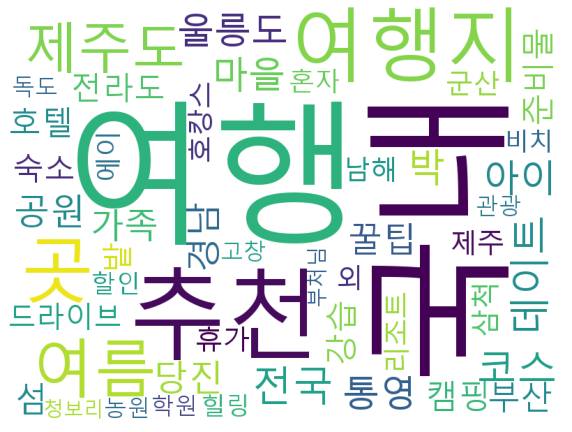

In [3]:
blog_search('국내여행')

# 국내 여행 키워드 순위 
    1.제주도 2.울릉도 3.통영 4.당진 

섬 지역, 바다가 있는 지역이 트렌드

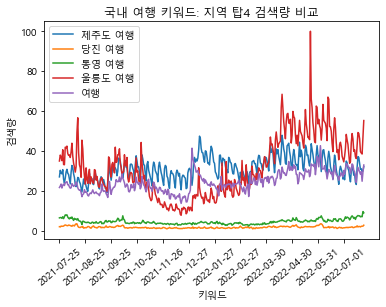

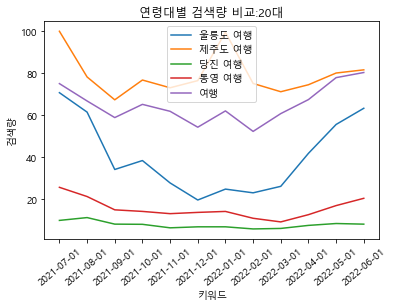

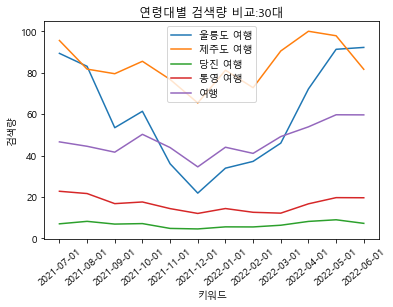

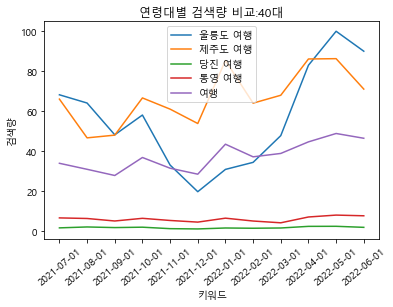

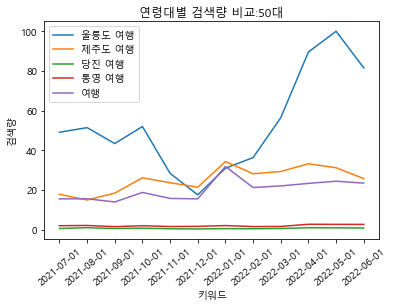

In [28]:
# 네이버 데이터 랩

df1=pd.read_excel('naver_search_travel.xlsx')
df2=pd.read_excel('travel_20.xlsx')
df3=pd.read_excel('travel_30.xlsx')
df4=pd.read_excel('travel_40.xlsx')
df5=pd.read_excel('travel_50.xlsx')

df1 =df1.set_index('날짜')
df2 =df2.set_index('날짜')
df3 =df3.set_index('날짜')
df4 =df4.set_index('날짜')
df5 =df5.set_index('날짜')

if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')
#colors	=	['cornflowerblue','tomato','y','b','r']

plt.plot(df1,	label=['제주도 여행','당진 여행','통영 여행','울릉도 여행','여행']	)

plt.title('국내 여행 키워드: 지역 탑4 검색량 비교')
plt.xlabel('키워드')
plt.ylabel('검색량')
plt.xticks(ticks=df1.index, labels=df1.index, rotation=40)
plt.locator_params(axis='x', nbins=12)
plt.legend()
plt.show()

plt.plot(df2,	label=['울릉도 여행','제주도 여행','당진 여행','통영 여행','여행']	)
plt.title('연령대별 검색량 비교:20대')
plt.xlabel('키워드')
plt.ylabel('검색량')
plt.xticks(rotation=40)
plt.legend()
plt.show()

plt.plot(df3,	label=['울릉도 여행','제주도 여행','당진 여행','통영 여행','여행']	)
plt.title('연령대별 검색량 비교:30대')
plt.xlabel('키워드')
plt.ylabel('검색량')
plt.xticks(rotation=40)
plt.legend()
plt.show()

plt.plot(df4,	label=['울릉도 여행','제주도 여행','당진 여행','통영 여행','여행']	)
plt.title('연령대별 검색량 비교:40대')
plt.xlabel('키워드')
plt.ylabel('검색량')
plt.xticks(rotation=40)
plt.legend()
plt.show()

plt.plot(df5,	label=['울릉도 여행','제주도 여행','당진 여행','통영 여행','여행']	)
plt.title('연령대별 검색량 비교:50대')
plt.xlabel('키워드')
plt.ylabel('검색량')
plt.xticks(rotation=40)
plt.legend()
plt.show()

# 검색량 순위 
    1.울릉도여행 2.제주도여행 3.통영여행 4.당진여행

# 울릉도 연령별 검색량 비교(20,30,40,50대)
    * 연령대가 높아질수록 울릉도 여행 관심도 증가
    * 여름에 높은 관심도

울릉도 여행은 독도와 함께 개인이 여행가기 힘든 환경으로 여행사를 많이 이용
    

{'울릉도': 375, '숙박': 308, '펜션': 100, '리조트': 98, '숙소': 87, '추천': 74, '대아': 62, '호텔': 46, '여행': 40, '자유여행': 36, '후기': 32, '뷰': 31, '케렌': 21, '시아': 21, '도동': 20, '항': 20, '울릉': 20, '오션': 19, '렌트카': 19, '바다': 18, '해': 18, '풍경': 18, '민박': 18, '산': 17, '관광': 16, '정보': 16, '게스트하우스': 16, '박': 16, '차': 15, '일출명소': 15, '근처': 15, '할인': 14, '요금': 14, '크루즈': 14, '라페루즈': 13, '코스모스': 13, '섬앤썸': 13, '신축': 13, '추산': 13, '배편': 12, '풀': 12, '빌라': 12, '장소': 12, '리얼': 11, '푸른': 10, '언덕': 10, '동해': 9, '오름': 9, '국적': 9, '채': 9}


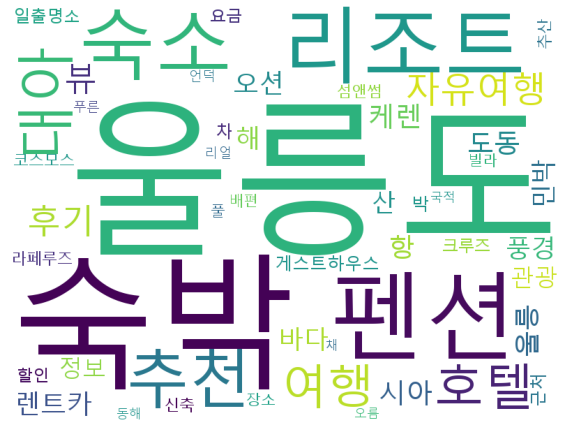

{'울릉도': 385, '맛집': 363, '식당': 120, '도동': 72, '여행': 69, '횟집': 54, '신비': 47, '섬': 47, '물회': 42, '독도': 39, '초밥': 36, '추천': 36, '저동항': 33, '후기': 32, '금수산': 31, '이사부': 28, '오징어': 27, '돈': 27, '산': 27, '울릉': 26, '새우': 25, '따개비': 25, '항': 25, '밥': 24, '회': 22, '꽁치': 22, '태양': 22, '카페': 19, '여기': 18, '편': 16, '투어': 16, '호떡': 15, '가면': 14, '칼국수': 14, '바위': 14, '일몰': 14, '저동': 14, '비빔밥': 14, '꼭': 13, '홍합': 13, '무조건': 12, '올레': 12, '크루즈': 12, '미당': 12, '전주': 12, '및': 11, '특산': 11, '물': 11, '집': 11, '광': 11}


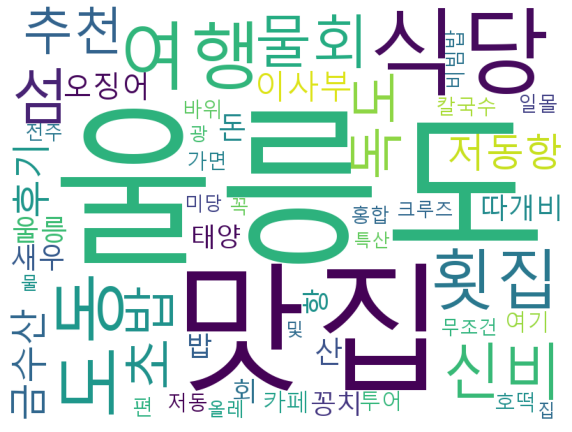

{'울릉도': 511, '관광': 150, '관광명소': 142, '여행': 71, '관광지': 43, '추천': 40, '봉래폭포': 37, '코스': 33, '독도': 33, '섬': 28, '태': 28, '명소': 26, '전망대': 26, '웰컴': 23, '여행사': 20, '신비': 19, '산책로': 18, '정보': 17, '대표': 17, '도동': 15, '등대': 14, '투': 14, '하향': 14, '목': 14, '모노레일': 14, '나리분지': 13, '행': 13, '남해안': 13, '여행명소': 13, '향목': 13, '투어': 12, '박': 11, '폭포': 10, '관음도': 10, '북면': 10, '겨울': 10, '신령': 9, '수': 9, '메밀': 9, '밭': 9, '보너스': 9, '항': 9, '해안': 9, '생태': 9, '길': 9, '민박': 9, '버스': 9, '도보': 9, '스탬': 9, '프투': 9}


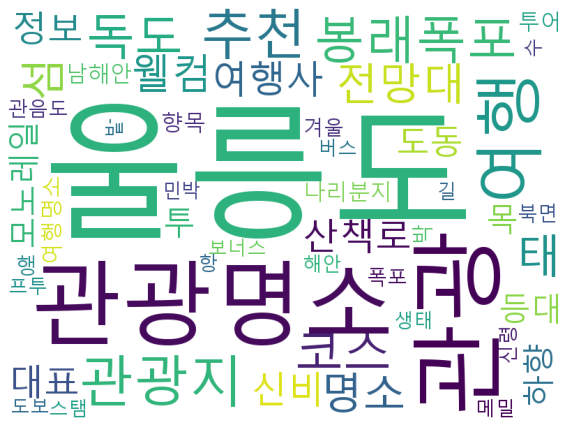

{'울릉도': 413, '카페': 394, '울': 153, '맛집': 72, '여행': 62, '곳': 51, '커피': 46, '추천': 43, '뷰': 39, '코스모스': 31, '후기': 27, '울릉': 25, '국화': 25, '리조트': 24, '아이스크림': 22, '독도': 21, '오션': 19, '식당': 18, '새우': 18, '먹물': 17, '글림': 16, '기념품': 16, '만': 15, '나리분지': 14, '명가': 14, '빵': 14, '바다': 13, '미당': 13, '섬': 12, '호박': 12, '중': 12, '밥': 11, '숙소': 11, '처': 11, '메뉴': 11, '관음도': 11, '바위': 11, '투어': 10, '북면': 10, '족욕': 9, '식사': 9, '성인봉': 9, '등산': 9, '다섯': 9, '군데': 9, '화답': 9, '올레': 9, '펜션': 9, '패킹': 9, '게스트하우스': 9}


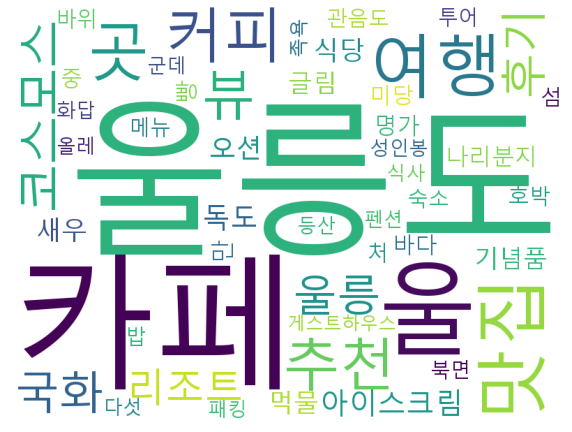

In [5]:
blog_search('울릉도 숙박')
blog_search('울릉도 맛집')
blog_search('울릉도 관광명소')
blog_search('울릉도 카페')

# 숙박: 코스모스, 대아리조트, 케렌시아 풀빌라 리조트, 라페루즈 리조트, 호텔섬앤썸
# 맛집: 신비섬횟집,이사부초밥, 올레식당, 따개비 칼국수
# 관광명소: 봉래폭포, 태하향목관광모노레일, 나리분지
# 카페: 울릉국화, 저동커피(먹물 아이스크림), 글림,

# [울릉도 키워드 분석을 통한 여행 트렌드]
#### ● 숙박
     대아리조트, 케렌시아 풀빌라 리조트, 라페루즈 리조트, 호텔섬앤썸
#### ● 맛집
     신비섬횟집,이사부초밥, 올레식당
#### ● 관광명소
     봉래폭포, 태하향목관광모노레일, 나리분지   
#### ● 카페
     울릉국화, 저동커피(먹물 아이스크림), 글림

 --->    태하향목관광모노레일 


---     

{'울릉도': 406, '코스': 312, '육로': 307, '관광': 243, '여행': 196, '박': 95, '독도': 88, '섬': 74, '일주': 69, '패키지': 67, '나리분지': 62, '날': 50, '투어': 50, '버스': 39, '호텔': 26, '동해': 24, '관음도': 23, '도동': 21, '통': 20, '구미': 20, '식당': 19, '전망대': 18, '후기': 17, '케이블카': 17, '림': 17, '뉴': 16, '울릉': 15, '사동': 15, '일출': 14, '및': 14, '포함': 14, '편': 13, '전': 13, '오늘': 13, '태': 13, '소개': 12, '저동': 12, '바퀴': 11, '신비': 11, '삼선': 11, '암': 11, '남양': 11, '성불사': 10, '바위': 10, '코스모스': 9, '도배': 9, '정보': 9, '구': 9, '위드유': 9, '해안': 9}


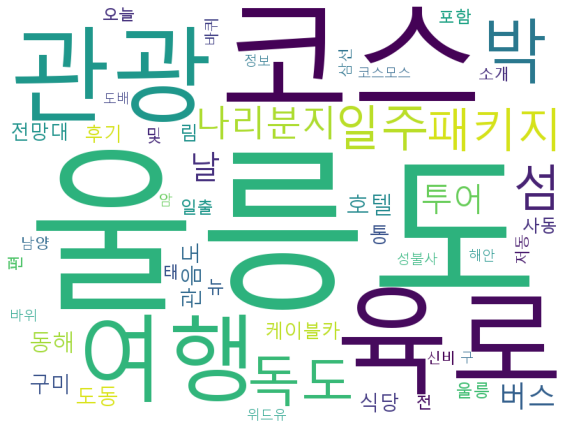

{'울릉도': 409, '육로': 311, '관광': 298, '코스': 290, '여행': 197, '박': 82, '봉래폭포': 73, '전망대': 71, '패키지': 66, '독도': 60, '수전': 51, '날': 48, '버스': 44, '일주': 42, '섬': 40, '일출': 36, '투어': 31, '촛대': 26, '바위': 26, '관음도': 24, '나리분지': 18, '뉴': 17, '동해': 17, '호텔': 15, '둘째': 14, '돌기': 14, '울릉': 14, '소개': 14, '강릉항': 13, '도동': 13, '식당': 12, '삼선': 12, '암': 12, '출발': 11, '신비': 10, '카페': 10, '저동': 9, '후포': 8, '식사': 8, '상품': 8, '비교': 8, '및': 8, '총': 8, '금수산': 8, '새우': 8, '기록': 8, '위드유': 8, '전': 8, '바퀴': 7, '코스모스': 7}


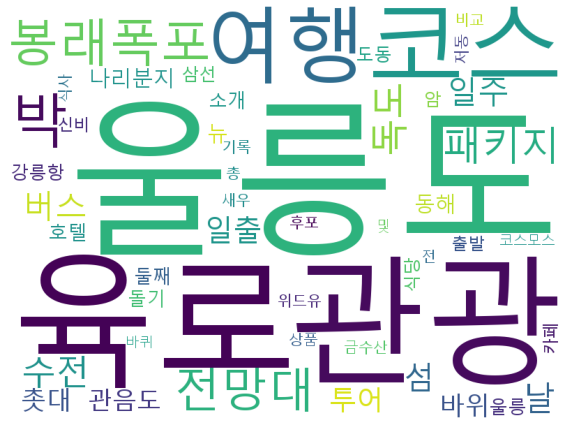

In [30]:
blog_search('울릉도 육로A코스')
blog_search('울릉도 육로관광 B코스')

In [ ]:
def	search_tour(keyword):	#	본인의 webdriver 경로
    blog_title_text=[]
    noun_list =[]
    counts =[]
    tag =[]
    
    
    wd	= webdriver.Chrome('C:\MINSU\chromedriver')
    main_url =f"https://www.hanatour.com/trp/pkg/CHPC0PKG0200M200?pkgCd=AK003122081700A&prePage=CHPC0PKG0100M200&depDowCd=4" #

    wd.get(main_url)	
    
    html	=	wd.page_source
    soupData =	BeautifulSoup(html,	'html.parser')
    blog_title =	soupData.find_all('span',	{'class':'title'})
    
    for i in range(7):
        blog_title_text.append(blog_title[i].text)
    #print(blog_title_text)
    
    
    for data in blog_title_text:
        sentences_tag = okt.pos(data)
        # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
        for word, tag in sentences_tag:
            if tag in ['Noun']:
                noun_list.append(word)
    wd.quit()
    
    counts	= Counter(noun_list)
    tags	= counts.most_common(50)
    
    if	platform.system()	==	'Windows':
        path	=	r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()	==	'Darwin':		#	Mac	OS
        path	=	r'/System/Library/Fonts/AppleGothic'
    else:
        path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    wc =	WordCloud(font_path=path,	background_color='white',	width=800,	height=600, random_state = 30)
    print(dict(tags))
    cloud	=	wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,	8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()     
